In [16]:
import ipywidgets.widgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import cv2
import imutils

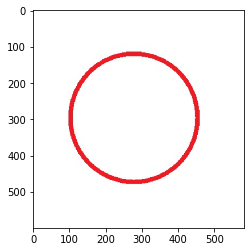

In [18]:
image = cv2.imread('circle.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB);

ratio = image.shape[0] / 600.0
orig = image.copy()
image = imutils.resize(image, height = 600)
plt.imshow(image)

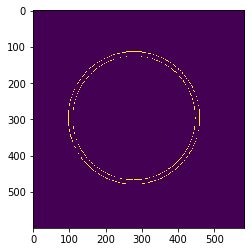

In [19]:
# convert the image to grayscale, blur it, and find edges in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(gray, 30, 200)
plt.imshow(edged)

In [20]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
# cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]

# cpyImg = image.copy()
# for c in cnts:
#     cv2.drawContours(cpyImg, c, -1, (0, 255, 0), 3)
#     plt.imshow(cpyImg)


In [32]:
import traitlets
from traitlets.config.configurable import Configurable


class Image(Configurable):

    value = traitlets.Float()

    def __init__(self, *args, **kwargs):
        super(Image, self).__init__(*args, **kwargs)  # initializes traitlets
        
    @traitlets.observe('value')
    def _observe_value(self, change):
        self._write_value(change['new'])

    def _write_value(self, value):
        """Sets motor value between [-1, 1]"""
        mapped_value = value

In [68]:
screenCnt = None

# create two sliders with range [-1.0, 1.0]
slider = widgets.FloatSlider(description='left', min=0, max=1, step=0.001, orientation='horizontal', readout_format='.3f',)

def draw_circle(slider):
    # loop over our contours
    for c in cnts:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        # epsilon Parameter specifying the approximation accuracy. This is the maximum distance between the original curve and its approximation.
        # 2nd参数是epsilon， 判断点到相对应的line segment 的距离的阈值。（距离大于此阈值则舍弃，小于此阈值则保留，epsilon越小，折线的形状越“接近”曲线。）
        approx = cv2.approxPolyDP(c, float(slider)*peri, True)
        screenCnt = approx

    cloned_image = image.copy()
    cv2.drawContours(cloned_image, [screenCnt], -1, (0, 255, 0), 3)
    plt.imshow(cloned_image)

        
output = widgets.interactive_output(draw_circle, {'slider': slider})

        
# create a horizontal box container to place the sliders next to eachother
slider_container = widgets.HBox([slider, output])

# display the container in this cell's output
display(slider_container)